In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from itertools import *
df = pd.read_csv("customer_dataset.csv")
pd.set_option('display.max_rows', 20)
print(df.shape)
df

(8068, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [2]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [3]:
print(df['Profession'].value_counts())
print(df['Spending_Score'].value_counts())
print(df['Gender'].value_counts())

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64
Male      4417
Female    3651
Name: Gender, dtype: int64


In [4]:
df[(pd.isna(df['Profession'])) & ((df['Work_Experience'] == 0) | (pd.isna(df['Work_Experience'])))]


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
219,465837,Male,No,62,Yes,NaN,0.0,Low,1.0,Cat_6
237,467252,Female,No,33,Yes,NaN,0.0,Low,4.0,NaN
437,461410,Male,Yes,79,No,NaN,0.0,Average,2.0,NaN
440,460532,Female,No,18,No,NaN,0.0,Low,6.0,Cat_6
498,459656,Male,No,22,No,NaN,NaN,Low,6.0,Cat_1
...,...,...,...,...,...,...,...,...,...,...
7678,460824,Male,Yes,66,Yes,NaN,0.0,Low,2.0,Cat_2
7717,462628,Female,Yes,28,No,NaN,NaN,Average,3.0,Cat_4
7725,467357,Male,Yes,60,Yes,NaN,0.0,Low,2.0,Cat_6
7743,467388,Male,No,35,NaN,NaN,0.0,Low,NaN,Cat_6


In [5]:
df['Not working'] = ((pd.isna(df['Profession'])) & ((df['Work_Experience'] == 0) | (pd.isna(df['Work_Experience'])))).astype(int)

In [6]:
df = df.join(pd.get_dummies(df.Profession).astype(int))
df = df.join(pd.get_dummies(df.Spending_Score).astype(int))
df = df.join(pd.get_dummies(df.Gender).astype(int))
df = df.drop(columns=['Profession', 'Spending_Score', 'Gender'])


In [7]:
df['Ever_Married'] = df['Ever_Married'].astype(str).map(lambda x : 0 if x == 'No' else 1 if x == 'Yes' else np.nan)
df['Graduated'] = df['Graduated'].astype(str).map(lambda x : 0 if x == 'No' else 1 if x == 'Yes' else np.nan)
ID = df['ID']
df = df.drop(columns=['ID'])

In [8]:
df['Family_Size'] = df['Family_Size'].fillna(value=0) #------------------
df['Var_1'] = df['Var_1'].astype(str).map(lambda x : np.nan if x == 'nan' else float(x[-1]))
df.isna().sum()

Ever_Married       140
Age                  0
Graduated           78
Work_Experience    829
Family_Size          0
                  ... 
Average              0
High                 0
Low                  0
Female               0
Male                 0
Length: 21, dtype: int64

In [9]:
df

,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Var_1,Not working,Artist,Doctor,Engineer,...,Executive,Healthcare,Homemaker,Lawyer,Marketing,Average,High,Low,Female,Male
0,0.0,22,0.0,1.0,4.0,4.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1.0,38,1.0,NaN,3.0,4.0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,1.0,67,1.0,1.0,1.0,6.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,1.0,67,1.0,0.0,2.0,6.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,1.0,40,1.0,NaN,6.0,6.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0.0,22,0.0,0.0,7.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8064,0.0,35,0.0,3.0,4.0,4.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
8065,0.0,33,1.0,1.0,1.0,6.0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
8066,0.0,27,1.0,1.0,4.0,6.0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [10]:
columns = ['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist', 'Executive', 'Doctor', 'Homemaker', 'Marketing']
data = []
for col in columns:
    total = df[col].sum()
    male = len(df[(df[col] == 1) & (df['Male'] == 1)])
    female = len(df[(df[col] == 1) & (df['Female'] == 1)])
    data.append([total, male, female])
new_df = pd.DataFrame(data, columns=['Total', 'Male', 'Female'], index=columns)
new_df

,Total,Male,Female
Healthcare,1332,775,557
Engineer,699,140,559
Lawyer,623,316,307
Entertainment,949,696,253
Artist,2516,1303,1213
Executive,599,567,32
Doctor,688,384,304
Homemaker,246,43,203
Marketing,292,128,164


In [11]:
df.isna().sum()

Ever_Married       140
Age                  0
Graduated           78
Work_Experience    829
Family_Size          0
                  ... 
Average              0
High                 0
Low                  0
Female               0
Male                 0
Length: 21, dtype: int64

In [27]:
result = df.groupby('Age')['Ever_Married'].value_counts(normalize=1).unstack()
result['Count'] = df['Age'].value_counts()
pd.set_option('display.max_rows', 10)

result

Ever_Married,0.0,1.0,Count
Age,,,
18,0.969697,0.030303,132
19,0.970149,0.029851,134
20,0.976378,0.023622,127
21,0.974138,0.025862,116
22,0.950704,0.049296,142
...,...,...,...
85,0.090909,0.909091,22
86,0.066667,0.933333,30
87,0.071429,0.928571,28


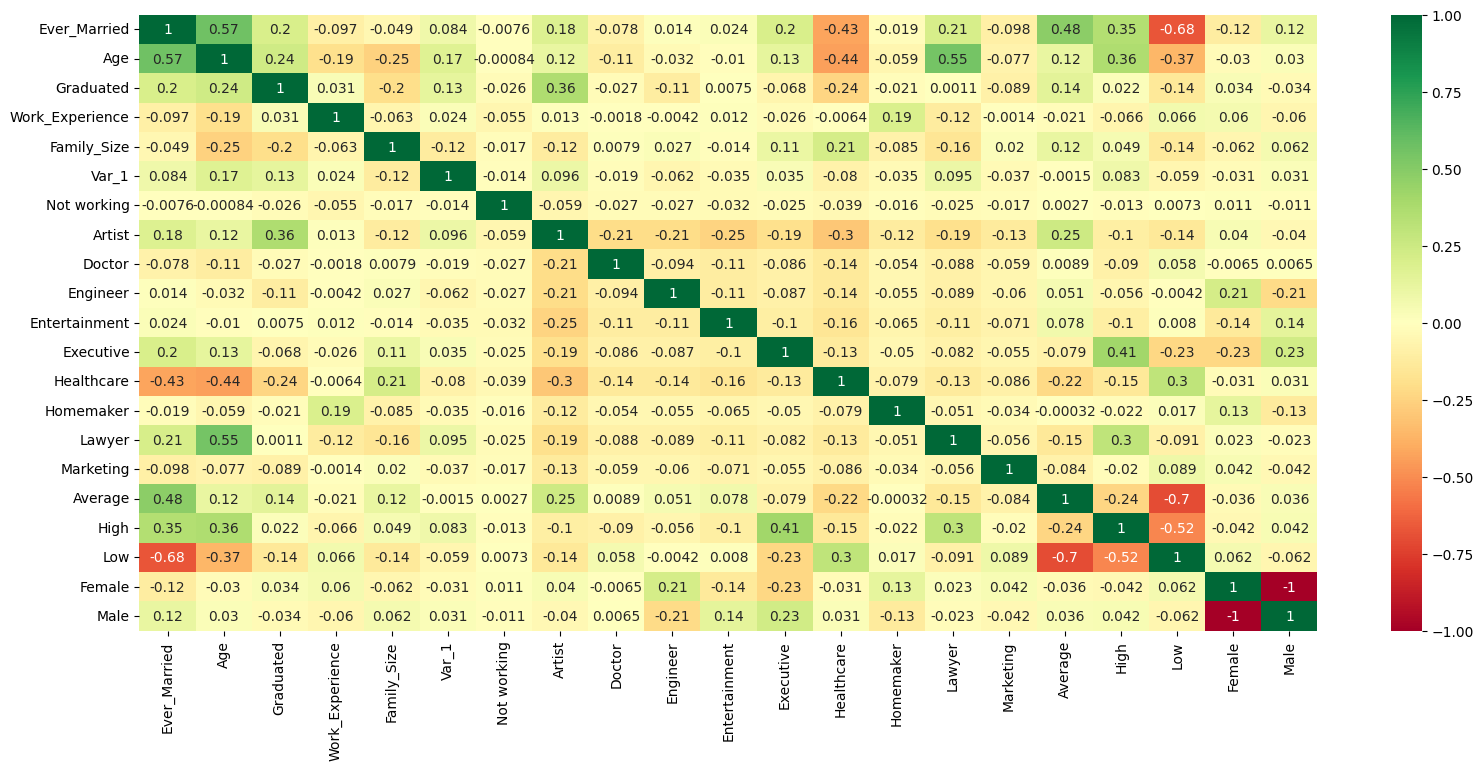

In [13]:
corr_df = df.corr()
low_corr_columns = corr_df[abs(corr_df['Family_Size']) < 0].index;
plt.subplots(figsize=(19, 8));
sns.heatmap(df.drop(columns=low_corr_columns).corr(), xticklabels=df.drop(columns=low_corr_columns).corr().columns, yticklabels=df.drop(columns=low_corr_columns).corr().columns, cmap='RdYlGn', center=0, annot=True, fmt='.2g');
plt.show();


In [14]:
df['Ever_Married'] = df.groupby('Age')['Ever_Married'].transform(lambda x: x.fillna(x.mode()[0]));

In [15]:
pd.set_option('display.max_rows', 20)
df.isna().sum()

Ever_Married         0
Age                  0
Graduated           78
Work_Experience    829
Family_Size          0
                  ... 
Average              0
High                 0
Low                  0
Female               0
Male                 0
Length: 21, dtype: int64

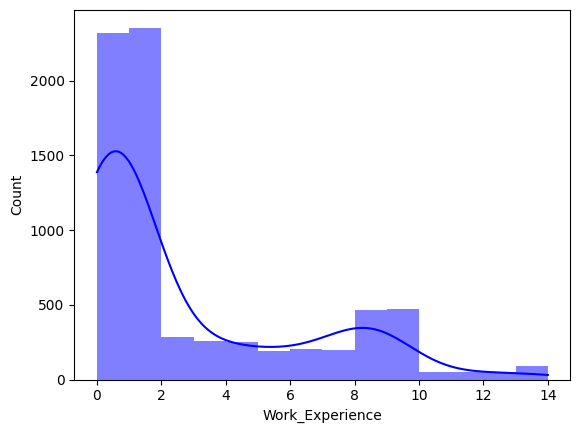

In [16]:
sns.histplot(df['Work_Experience'], bins=14, color="blue", kde=True, linewidth=0, kde_kws={'bw_adjust': 2});

In [17]:
grouped_df = df.groupby('Graduated').mean()
grouped_df

,Ever_Married,Age,Work_Experience,Family_Size,Var_1,Not working,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Average,High,Low,Female,Male
Graduated,,,,,,,,,,,,,,,,,,,,
0.0,0.458968,38.376241,2.496042,3.138650,4.914267,0.010258,0.096956,0.095301,0.127399,0.114163,0.097287,0.279285,0.035076,0.076109,0.057247,0.166446,0.140635,0.692919,0.431171,0.568829
1.0,0.662641,46.542271,2.717478,2.483897,5.285917,0.005636,0.444646,0.079509,0.062399,0.119163,0.060386,0.095813,0.027778,0.076691,0.022947,0.291868,0.157005,0.551127,0.466184,0.533816


In [18]:
df = df.drop(columns=['Var_1'])
mode = df['Work_Experience'].loc[df['Work_Experience'] != np.nan].mode().iloc[0]
df['Work_Experience'] = df['Work_Experience'].fillna(mode)

mode = df['Graduated'].loc[df['Graduated'] != np.nan].mode().iloc[0]
df['Graduated'] = df['Graduated'].fillna(mode)

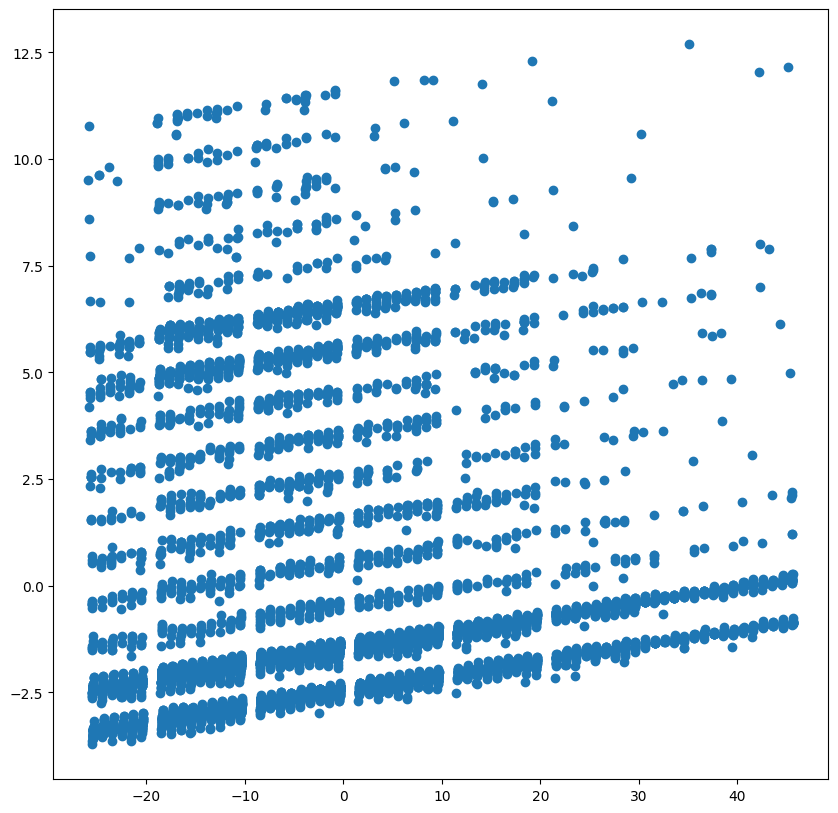

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)
plt.figure(figsize=(10, 10))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

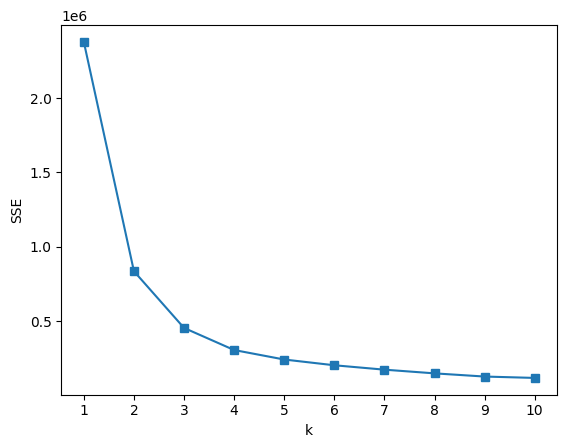

In [20]:
from sklearn.cluster import KMeans
k_values = range(1, 11)
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='s')
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


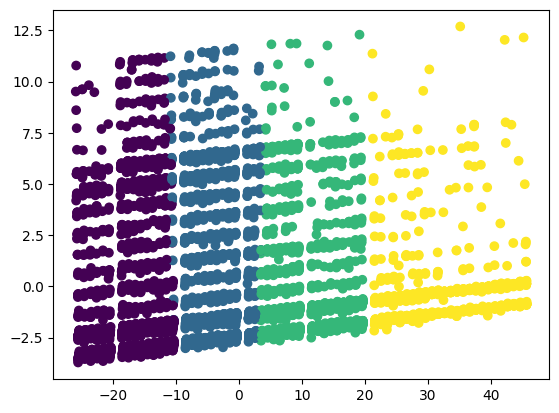

In [35]:
from sklearn.cluster import KMeans
import numpy as np
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)
clusters = kmeans.predict(df)
order = np.argsort(np.linalg.norm(kmeans.cluster_centers_, axis=1))
new_clusters = np.zeros_like(clusters)
for i in range(k):
    new_clusters[clusters == order[i]] = i
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=new_clusters)
plt.show()

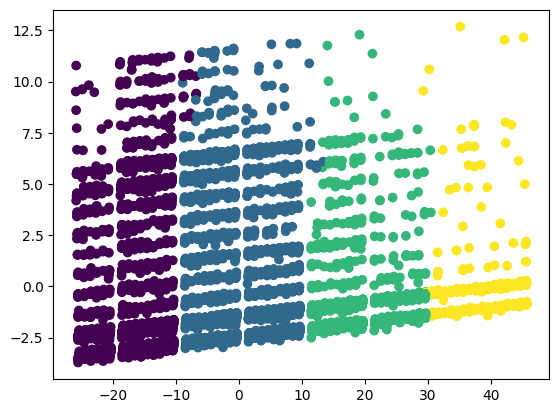

In [22]:
from sklearn.cluster import AgglomerativeClustering
k = 4
model = AgglomerativeClustering(n_clusters=k)
model.fit(df)
clusters_1 = model.labels_
cluster_centers = np.zeros((k, df.shape[1]))
for i in range(k):
    cluster_centers[i] = np.mean(df[clusters_1 == i], axis=0)
order = np.argsort(np.linalg.norm(cluster_centers, axis=1))
new_clusters_2 = np.zeros_like(clusters_1)
for i in range(k):
    new_clusters_2[clusters_1 == order[i]] = i
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=new_clusters_2)
plt.show()

In [23]:
ans = pd.DataFrame({'ID': ID, 'Segmentation': new_clusters + 1})
print(ans.shape)
ans.to_csv('ans.csv', index=False)

(8068, 2)


In [24]:
df['new_clusters'] = new_clusters
grouped = df.groupby('new_clusters').mean()
grouped

,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Not working,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Average,High,Low,Female,Male
new_clusters,,,,,,,,,,,,,,,,,,,,
0,0.171526,26.435062,0.377887,2.736463,3.313139,0.007573,0.112457,0.127603,0.077243,0.096554,0.026126,0.443771,0.041272,0.001515,0.057175,0.074214,0.039000,0.886785,0.463839,0.536161
1,0.645790,39.783492,0.765243,3.321443,2.447117,0.008710,0.446288,0.085856,0.111157,0.143924,0.075487,0.051016,0.036499,0.002074,0.033181,0.332642,0.111572,0.555786,0.484861,0.515139
2,0.871451,53.825503,0.785751,1.786784,2.738255,0.007228,0.486835,0.060919,0.096025,0.143521,0.112029,0.017553,0.020134,0.022716,0.022716,0.430563,0.179659,0.389778,0.416107,0.583893
3,0.951807,74.789620,0.631140,1.164041,1.933272,0.006487,0.185357,0.024096,0.037998,0.063948,0.121409,0.002780,0.009268,0.528267,0.015755,0.131603,0.459685,0.408712,0.417980,0.582020
